# Glass Identification

**Project Description:**
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
headers = ['ID Number', 'RI', 'Na', 'Mg', 'Al','Si', 'K', 'Ca', 'Ba', 'Fe','Class']

In [28]:
#load data from csv file
df = pd.read_csv("C://Users//rahul//OneDrive//Desktop//data trained//internship//Sample project//Pro ph 3//Glass Identification.csv", names=headers)
df.head()

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [29]:
df.tail()

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [30]:
df.shape

(214, 11)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID Number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Class      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [32]:
df.isnull().sum()

ID Number    0
RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
Class        0
dtype: int64

<AxesSubplot:>

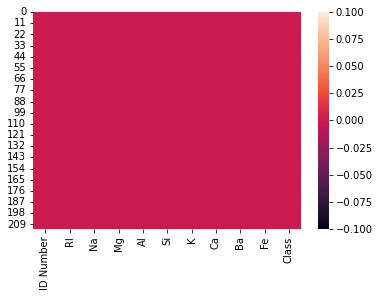

In [33]:
sns.heatmap(df.isnull())

In [34]:
df.nunique()

ID Number    214
RI           178
Na           142
Mg            94
Al           118
Si           133
K             65
Ca           143
Ba            34
Fe            32
Class          6
dtype: int64

In [35]:
df.describe()

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [13]:
#Encoding categorical variable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
x = df.drop("Class", axis=1)
y = df['Class']

In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Class, Length: 214, dtype: int64

In [42]:
x

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [43]:
# spliting the data into train and test
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
#scaling
sc = StandardScaler()

In [45]:
x_train[['Na', 'Si', 'Ca']] = sc.fit_transform(x_train[['Na', 'Si', 'Ca']])
x_test[['Na', 'Si', 'Ca']] = sc.transform(x_test[['Na', 'Si', 'Ca']])

In [46]:
#Model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.9069767441860465
Confusion Matrix:  [[10  1  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0  8]]
Classification Report:                precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.82      1.00      0.90        14
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.91        43
   macro avg       0.95      0.82      0.85        43
weighted avg       0.92      0.91      0.90        43



In [48]:
# Random forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  1.0
Confusion Matrix:  [[11  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [49]:
# Extra tree classifier
etc = ExtraTreeClassifier()
etc.fit(x_train, y_train)
pred = etc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.8372093023255814
Confusion Matrix:  [[10  1  0  0  0  0]
 [ 0 13  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  1  1  1]
 [ 0  0  0  1  0  7]]
Classification Report:                precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.81      0.93      0.87        14
           3       0.75      1.00      0.86         3
           5       0.50      0.50      0.50         4
           6       1.00      0.33      0.50         3
           7       0.88      0.88      0.88         8

    accuracy                           0.84        43
   macro avg       0.82      0.76      0.76        43
weighted avg       0.85      0.84      0.83        43



In [50]:
# support vector classifier
svc=SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.7906976744186046
Confusion Matrix:  [[11  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  0  3  0  0  1]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  8]]
Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.88      1.00      0.93        14
           3       0.25      0.33      0.29         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.67      1.00      0.80         8

    accuracy                           0.79        43
   macro avg       0.47      0.56      0.50        43
weighted avg       0.68      0.79      0.73        43



In [51]:
# Gradient boosting
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  1.0
Confusion Matrix:  [[11  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [52]:
# Adaptive boost
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
pred = abc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  0.7674418604651163
Confusion Matrix:  [[11  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  0  0  8]]
Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.58      1.00      0.74        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.77        43
   macro avg       0.43      0.50      0.46        43
weighted avg       0.63      0.77      0.68        43



In [53]:
# Bagging classifier
bc = BaggingClassifier()
bc.fit(x_train, y_train)
pred = bc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: ", classification_report(y_test, pred))

Accuracy Score:  1.0
Confusion Matrix:  [[11  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



 Random Forest, Gradient Boosting, Bagging Classifier gives 100% accuracy score